In [6]:
from neo4j import GraphDatabase

uri = "bolt://localhost:7690"
username = "neo4j"
password = "Aryan@2004"
driver = GraphDatabase.driver(uri, auth=(username, password))

In [7]:
try:
    with driver.session() as session:
        result = session.run("RETURN 1 AS test")
    print("Connection successful")
except Exception as e:
    print(f"Connection failed: {e}")

Connection successful


In [10]:
import os
with open('./path.txt','r') as f:
    path = f.read()
os.path.exists(path)

True

In [12]:
business_path = "yelp_academic_dataset_business.json"
checkin_path = "yelp_academic_dataset_checkin.json"
review_path = "yelp_academic_dataset_review.json"
tip_path = "yelp_academic_dataset_tip.json"
user_path = "yelp_academic_dataset_user.json"

business_path, checkin_path, review_path, tip_path, user_path = list(map(lambda y: path + '/' + y,[business_path, checkin_path, review_path, tip_path, user_path]))

# User filtering

In [4]:
import pandas as pd
import json

df_user = pd.concat(pd.read_json(user_path, lines=True, chunksize=1000), ignore_index=True)
df_user = df_user[df_user['useful'] > 40]
print(df_user.shape[0])
# df_checkin = pd.concat(pd.read_json(checkin_path, lines=True, chunksize=1000), ignore_index=True)
# df_tip = pd.concat(pd.read_json(tip_path, lines=True, chunksize=1000), ignore_index=True)

221708


In [ ]:
df1 = df_user[df_user['fans'] > 5]
print(df1.shape[0])
df2 = df1[df1['review_count'] > 100]
print(df2.shape[0])
df3 = df2[df2['friends'].str.split(',').map(len) > 45]
print(df3.shape[0])

46770
41443
41371


In [6]:
df3.to_csv('users.csv', index=False)

In [7]:
df3.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000
mean,378.433685,1321.367915,630.970849,922.974837,47.183172,3.904295,78.920548,9.839743,7.498175,5.693795,2.877499,53.421406,125.114138,119.974572,119.974572,42.077325,54.362428
std,389.038425,4245.140841,2752.974087,3809.825993,115.696545,0.345328,503.637927,88.287079,104.765209,78.481771,69.555291,413.212087,817.948308,658.679951,658.679951,219.010969,657.191221
min,101.000000,42.000000,0.000000,8.000000,11.000000,1.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,181.000000,310.000000,82.000000,136.000000,15.000000,3.690000,4.000000,1.000000,0.000000,0.000000,0.000000,6.000000,9.000000,9.000000,9.000000,5.000000,2.000000
50%,274.000000,529.000000,171.000000,257.000000,24.000000,3.910000,10.000000,3.000000,1.000000,0.000000,0.000000,13.000000,19.000000,21.000000,21.000000,12.000000,5.000000
75%,440.000000,1036.000000,410.000000,589.000000,43.000000,4.130000,31.000000,7.000000,3.000000,2.000000,1.000000,31.000000,49.000000,57.000000,57.000000,28.000000,14.000000
max,17473.000000,206296.000000,185823.000000,199878.000000,12497.000000,5.000000,25784.000000,13501.000000,14180.000000,13654.000000,12669.000000,59031.000000,101097.000000,49967.000000,49967.000000,15934.000000,82630.000000


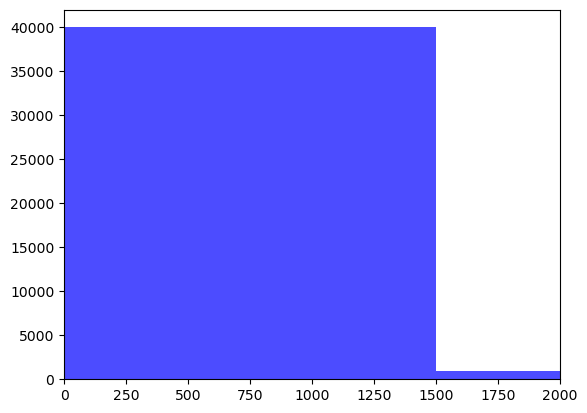

In [8]:
import matplotlib.pyplot as plt

plt.hist(df3['friends'].str.split(',').map(len), color='blue', alpha=0.7)
plt.xlim(0,2000)
plt.show()


# Business Filtering

In [9]:
df_business = pd.concat(pd.read_json(business_path, lines=True, chunksize=1000), ignore_index=True)

In [10]:
print(df_business.shape[0])
df_business1 = df_business[df_business['review_count'] > 44]
print(df_business1.shape[0])

150346
32115


In [11]:
df_business1.describe()

,latitude,longitude,stars,review_count,is_open
count,32115.000000,32115.000000,32115.000000,32115.000000,32115.000000
mean,36.169592,-89.537079,3.711038,156.390160,0.798350
std,5.322853,14.995062,0.743344,229.128127,0.401239
min,27.564457,-120.083745,1.000000,45.000000,0.000000
25%,30.011992,-90.324650,3.500000,61.000000,1.000000
50%,38.635129,-86.146391,4.000000,91.000000,1.000000
75%,39.947478,-75.405666,4.000000,165.000000,1.000000
max,53.649743,-74.682591,5.000000,7568.000000,1.000000


(array([3.1612e+04, 3.6800e+02, 8.2000e+01, 2.7000e+01, 9.0000e+00,
        9.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  45. ,  797.3, 1549.6, 2301.9, 3054.2, 3806.5, 4558.8, 5311.1,
        6063.4, 6815.7, 7568. ]),
 <BarContainer object of 10 artists>)

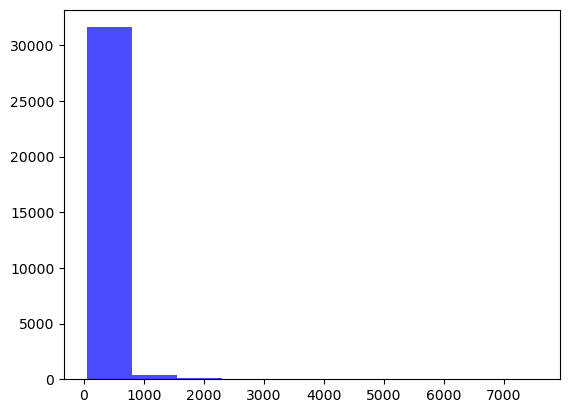

In [12]:
import matplotlib.pyplot as plt

plt.hist(df_business1['review_count'], color='blue', alpha=0.7)

In [13]:
df_business1.to_csv('business.csv', index=False)

# Review Filtering

In [13]:
import pandas as pd #ran //

df_review = pd.concat(pd.read_json(review_path, lines=True, chunksize=1000), ignore_index=True)
print(df_review.shape[0])
df_review.describe()

6990280


,stars,useful,funny,cool
count,6.990280e+06,6.990280e+06,6.990280e+06,6.990280e+06
mean,3.748584e+00,1.184609e+00,3.265596e-01,4.986175e-01
std,1.478705e+00,3.253767e+00,1.688729e+00,2.172460e+00
min,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,1.182000e+03,7.920000e+02,4.040000e+02


In [5]:
df_review.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [42]:
from tqdm import tqdm
from ast import literal_eval

df3 = pd.read_csv("C:/Users/susha/Desktop/DSM grp proj/filteredCSV/users.csv")
user_set = set(df3['user_id'])
print(type(df3['friends'][0]))
# i = 0
def find_top10(frenlist):
    # global i
    # print(i)
    # i+=1
    if type(frenlist)==str:
        friends=set(frenlist.split(','))
    else:
        return []
    # df_temp=df3[]
    # df_temp=[row for row in df3 if row['user_id'] in friends]
    df_temp=df3[df3['user_id'].isin(friends)]
    # print(df_temp['fans'])
    df_temp=df_temp.sort_values(by='fans', ascending=False)
    # print(df_temp['fans'])
    L= df_temp['user_id'].head(10).tolist()
    # print(L)
    return L

L=find_top10(df3['friends'][0])
print(type(L),len(L))
tqdm.pandas(desc="Top10")
df3['friends'] = df3['friends'].progress_map(find_top10)
print(df3['friends'].head())
# df3['friends'].map(len).describe()

<class 'str'>
<class 'list'> 10


Top10: 100%|██████████| 50241/50241 [04:31<00:00, 184.85it/s]

0    [VHdY6oG2JPVNjihWhOooAQ, iLjMdZi0Tm7DQxX1C1_2d...
1    [37cpUoM8hlkSQfReIEBd-Q, Hi10sGSZNxQH3NLyWSZ1o...
2    [djxnI8Ux8ZYQJhiOQkrRhA, G9Vb6yQ047TC3O_-GG4WZ...
3    [To7EBxWC-Yz011V2-tdTvA, 1kpMAKRZuAz3OzxBav3XT...
4    [hizGc5W1tBHPghM5YKCAtg, VHdY6oG2JPVNjihWhOooA...
Name: friends, dtype: object


In [45]:
print(type(df3['friends'][0]),len(df3['friends'][0]))
print(df3.head())


<class 'list'> 10
                  user_id    name  review_count        yelping_since  useful  \
0  qVc8ODYU5SZjKXVBgXdI7w  Walker           585  2007-01-25 16:47:26    7217   
1  j14WgRoU_-2ZE1aw1dXrJg  Daniel          4333  2009-01-25 04:35:42   43091   
2  2WnXYQFK0hXEoTxPtV2zvg   Steph           665  2008-07-25 10:41:00    2086   
3  SZDeASXq7o05mMNLshsdIA    Gwen           224  2005-11-29 04:38:33     512   
4  q_QQ5kBBwlCcbL1s4NVK3g    Jane          1221  2005-03-14 20:26:35   14953   

   funny   cool                                              elite  \
0   1259   5994                                               2007   
1  13066  27281  2009,2010,2011,2012,2013,2014,2015,2016,2017,2...   
2   1010   1003                           2009,2010,2011,2012,2013   
3    330    299                                     2009,2010,2011   
4   9940  11211       2006,2007,2008,2009,2010,2011,2012,2013,2014   

                                             friends  fans  ...  \
0  [VHdY6oG2J

In [ ]:
for i in range(10):
    # print(df3['friends'][i])
    print(len(df3['friends'][i]), i, "SFAUHFDI")

['VHdY6oG2JPVNjihWhOooAQ', 'iLjMdZi0Tm7DQxX1C1_2dg', 'nkN_do3fJ9xekchVC-v68A', '3zxy3LVBV3ttxoYbY4rQ8A', 'G9Vb6yQ047TC3O_-GG4WZA', 'B7ecAeAIrXg7sgmabS38pg', 'gjhzKWsqCIrpEd9pevbKZw', 'mvK1pv-x0Z5rP4Hz9cWBWw', '5MCBLBxr10NLUKZ4AboAMg', 'dIIKEfOgo0KqUfGQvGikPg']
10 0 SFAUHFDI
['37cpUoM8hlkSQfReIEBd-Q', 'Hi10sGSZNxQH3NLyWSZ1oA', 'JjXuiru1_ONzDkYVrHN0aw', 'VHdY6oG2JPVNjihWhOooAQ', 'fgwI3rYHOv1ipfVfCSx7pg', 'nkN_do3fJ9xekchVC-v68A', 'djxnI8Ux8ZYQJhiOQkrRhA', 'G9Vb6yQ047TC3O_-GG4WZA', 'AbMjnKOwg736fcIu8apuyQ', 'hdzTAN8DGJKRddkZ8279JQ']
10 1 SFAUHFDI
['djxnI8Ux8ZYQJhiOQkrRhA', 'G9Vb6yQ047TC3O_-GG4WZA', 'gjhzKWsqCIrpEd9pevbKZw', 'F_5_UNX-wrAFCXuAkBZRDw', 'wZPizeBxMAyOSl0M0zuCjg', 'EiwxlbR8fb68lMgEXhcWKA', 'HCP1pR_44Pw5_BiWAp47-Q', 'lPNsKsD-HvdgkzfGq-Gjig', '2l0O1EI1m0yWjFo2zSt71w', 'IzJ36jX6V6ky5BtoN-Agng']
10 2 SFAUHFDI
['To7EBxWC-Yz011V2-tdTvA', '1kpMAKRZuAz3OzxBav3XTg', '4Y81J2Tdq5XAnkeYmCZ2ow', 'RgDVC3ZUBqpEe6Y1kPhIpw', 'TEtzbpgA2BFBrC0y0sCbfw', 'UVxY0iyPaqY7s4BSFtt-xA', 'hcGgZ4PbKcM3K1clw

In [48]:
df3['friends'] = df3['friends'].map(lambda x: ','.join(x))
df3.to_csv('users.csv', index=False)


In [ ]:
from tqdm import tqdm
from ast import literal_eval

df3 = pd.read_csv('"C:/Users/susha/Desktop/DSM grp proj/filteredCSV/users.csv"')
df3['user_id'] = df3['user_id'].map(lambda x: x.strip())
user_set = set(df3['user_id'])

tqdm.pandas(desc="Splitting")
df3['friends'] = df3['friends'].fillna('').str.split(',').progress_map(lambda x: [i.strip() for i in x if i])
df3['friends'] = df3['friends'].progress_map(lambda x: [i for i in x if i in user_set] if isinstance(x, list) else [])
df3['friends'] = df3['friends'].progress_map(lambda x: ','.join(x) if isinstance(x, list) else '')

df3['friends'].map(len).describe()

FileNotFoundError: [Errno 2] No such file or directory: 'users.csv'

In [ ]:
df3.to_csv('users.csv', index=False)

In [64]:
from ast import literal_eval
df3 = pd.read_csv('users.csv')

df3['friends'] = df3['friends'].apply(literal_eval).apply(lambda x: ','.join(x))
df3.to_csv('users.csv', index=False)

In [33]:
df3.to_csv('users.csv', index=False)

In [4]:
import pandas as pd
df3 = pd.read_csv("C:/Users/susha/Desktop/DSM grp proj/filteredCSV/users.csv")

In [5]:
df_business1 = pd.read_csv("C:/Users/susha/Desktop/DSM grp proj/filteredCSV/business.csv")

In [6]:
# check if user_id is in df3 and business_id is in df_business1
df_review1 = df_review[df_review['user_id'].isin(df3['user_id'])]
print(df_review1.shape[0])
df_review2 = df_review1[df_review1['business_id'].isin(df_business1['business_id'])]

NameError: name 'df_review' is not defined

In [ ]:
print(df_review2.shape[0])
df_review2.describe()

801459


,stars,useful,funny,cool,date
count,801459.000000,801459.000000,801459.000000,801459.000000,801459
mean,3.936845,2.932030,1.073764,1.879973,2015-10-25 18:55:17.978704128
min,1.000000,0.000000,0.000000,0.000000,2005-02-16 03:23:22
25%,3.000000,0.000000,0.000000,0.000000,2013-05-14 00:35:43.500000
50%,4.000000,2.000000,0.000000,1.000000,2016-02-04 01:53:25
75%,5.000000,3.000000,1.000000,2.000000,2018-06-19 13:49:46
max,5.000000,399.000000,370.000000,399.000000,2022-01-19 18:59:27
std,1.028934,5.464713,3.190071,4.681420,NaN


In [ ]:
import pandas as pd

df_review2 = pd.read_csv('review.csv')

In [ ]:
print(df_review2[df_review2['useful'] > 3].shape[0])
print(df_review2[df_review2['useful'] > 8].shape[0])
df_review2 = df_review2[df_review2['useful'] > 8]
print(df_review2.shape[0])

196374
54686
54686


In [ ]:
df_review2.to_csv('review.csv', index=False)

(0.0, 80.0)

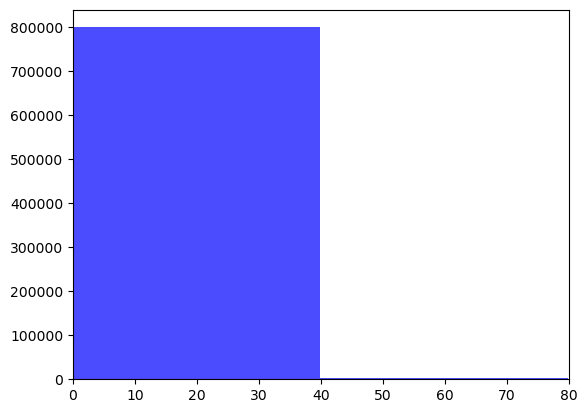

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df_review2['useful'],color='blue',alpha=0.7)
plt.xlim(0,80)

In [ ]:
business_path = "business.csv"
review_path = "review.csv"
# tip_path = "yelp_academic_dataset_tip.json"
user_path = "users.csv"

# business_path, review_path, user_path = list(map(lambda y: path + '/' + y,[business_path, review_path, user_path]))
# business_path, review_path, user_path = list(map(lambda y:'"'+ path + '/' + y+'"',[business_path, review_path, user_path]))
print(business_path)

business.csv
